Artificial neural networks are models inspired by networks of biological neurons that are made up of artificial neurons that individually perform various computations.

Topics:

- Overview
- Implementation
- Tuning

# Overview

One simple ANN architecture is the **Perceptron**, which is made up of a single layer of **threshold logic units (TLUs)**. A TLU computes a weighted sum of inputs and applies a step function to determine an output.

*Equation 1: Common step functions*

\begin{equation*}
\text{heaviside}(z) = \begin{cases}
0 \;\text{ if }\; z \lt t\\
1 \;\text{ if }\; z \geq t\\
\end{cases}
\end{equation*}

\begin{equation*}
\text{sgn}(z) = \begin{cases}\begin{aligned}
-1 \;\text{ if }\; z \lt t\\
0 \;\text{ if }\; z = t\\
1 \;\text{ if }\; z \geq t\\
\end{aligned}\end{cases}
\end{equation*}

where $t$ is some numeric threshold.

Each TLU in a Perceptron is connected to all of the inputs in the input layer, classifying the Perceptron as a **fully connected layer**. Constant inputs are referred to as **bias neurons**.

*Equation 2: Computing fully connected layer outputs*

\begin{equation*}
h_\mathbf{W},\mathbf{b}(\mathbf{X}) = \phi(\mathbf{XW}+\mathbf{b})
\end{equation*}

- $\mathbf{X}$ is the matrix of input features
- $\mathbf{W}$ is the vector of non-bias connectionn weights
- $\mathbf{b}$ is the vector of bias connection weights
- $\phi$ is the activation function (such as a step function)

Training a Perceptron involves adjusting the weights after making predictions on each training instance to reduce the error.

*Equation 3: Perceptron learning rule*

\begin{equation*}
w_{i,j}^{\text{next step}} = w_{i,j} + \eta  \bigl(y_j - \hat{y}_j\bigr)x_i
\end{equation*}

- $w_{i,j}$ is the connection weight between the $i^{\text{th}}$ input neuron and the $j^{\text{th}}$ output neuron
- $x_i$ is the $i^{\text{th}}$ input value of the current training instance
- $\hat{y}_j$ is the output of the $j^{\text{th}}$ output neuron for the current training instance
- $y_j$ is the target output of the $j^{\text{th}}$ output neuron for the current training instance
- $\eta$ is the learning rate

In [9]:
# Perceptron demonstration with sklearn
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

# Get petal length and width
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [2]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

A Multilayer Perceptron (MLP) is composed of one input layer, one or more hidden layers containing TLUs, and an output layer of TLUs. An artificial neural network that contains several hidden layers is considered a deep neural network (DNN).

The backpropagation algorithm is a common training algorithm for layered networks. It works by passing batches of data through the layers and preserving the intermediate results, computing the output error, determining how each intermediate result contributed to the error in the following layer, and performing Gradient Descent to tweak each weight to reduce the error at each step. Each full pass of a batch is referred to as an epoch.

Since the step function has no derivative, it is incompatible with Gradient Descent, and other activation functions must be used. Some options include:

- The logistic  sigmoid function: $\sigma(z) = 1/(1+\text{exp}(-z))$
- The hyperbolic tangent function: $tanh(z) = 2\sigma(2z)-1$
- The rectified linear unit function (ReLU): $\text{ReLU}(z) = max(0, z)$

## Implementation

Keras has three APIs for building models: the Sequential API, the Functional API, and the Subclassing API. Each of the following sections will demonstrate one of them.

### Classification (Sequential API)

In [1]:
import tensorflow as tf
from tensorflow import keras

# Use Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

# Split into test and train sets
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
# Normalize, separate validation and train sets
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
# Establish class names
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

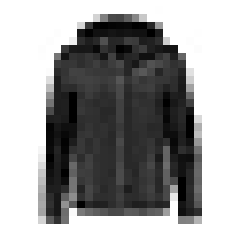

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
# Clear existing session
keras.backend.clear_session()

# Sequential model, single stack of layers connected sequentially
model = keras.models.Sequential()

# Flatten each input to a 1D array
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Two dense hidden layers, relu as it's usually the default
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))

# Dense output layer with one output per class, softmax for exclusive classification
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
keras.backend.clear_session()

# Alternatively, initialize the model with list of layers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
# View the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Access the list of layers
model.layers

In [13]:
# Access layers by name or index
model.get_layer('dense') is model.layers[1]

True

In [14]:
# Access weights and biases
weights, biases = model.get_layer('dense').get_weights()
weights, biases

(array([[ 0.05135491,  0.0093123 , -0.04415404, ..., -0.00132608,
         -0.06461485, -0.0686061 ],
        [-0.04437665, -0.0099875 , -0.00919275, ...,  0.00827672,
          0.03127936, -0.02838699],
        [-0.05012524,  0.05122694,  0.0237115 , ...,  0.00583497,
          0.06205806, -0.04497433],
        ...,
        [ 0.01310103,  0.02924064,  0.00442895, ...,  0.05478485,
         -0.04044497, -0.02812814],
        [-0.05405405,  0.03119689,  0.03655479, ..., -0.01992878,
         -0.04658104, -0.06543028],
        [ 0.04888155, -0.04975817, -0.04395811, ..., -0.02314116,
         -0.01381786,  0.01610918]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [15]:
# Compile the model to specify loss function and optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Note: sparse_categorical_crossentropy is used for exclusive classification. If one-hot vectors are desired, categorical_crossentropy should be used instead.

In [16]:
# Training the model returns a History object
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 150us/sample - loss: 0.7307 - accuracy: 0.7588 - val_loss: 0.5401 - val_accuracy: 0.8176
Epoch 2/30
55000/55000 [==============================] - 9s 159us/sample - loss: 0.4952 - accuracy: 0.8260 - val_loss: 0.4473 - val_accuracy: 0.8490
Epoch 3/30
55000/55000 [==============================] - 8s 143us/sample - loss: 0.4496 - accuracy: 0.8421 - val_loss: 0.4418 - val_accuracy: 0.8478
Epoch 4/30
55000/55000 [==============================] - 8s 142us/sample - loss: 0.4196 - accuracy: 0.8528 - val_loss: 0.3939 - val_accuracy: 0.8678
Epoch 5/30
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3994 - accuracy: 0.8595 - val_loss: 0.3855 - val_accuracy: 0.8678
Epoch 6/30
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3819 - accuracy: 0.8652 - val_loss: 0.3765 - val_accuracy: 0.8688
Epoch 7/30
55000/55000 [===========================

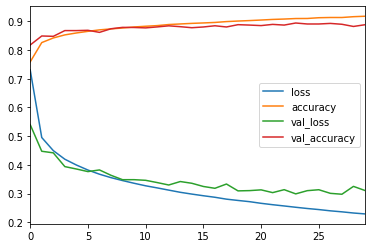

In [17]:
import pandas as pd

# The history can be plotted to observe the accuracy and loss over time
pd.DataFrame(history.history).plot()

In [18]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 134us/sample - loss: 75.0967 - accuracy: 0.8297


[75.09674187389612, 0.8297]

In [24]:
X_new = X_test[:3]

# Get probabilities for each class
y_proba = model.predict(X_new)

In [25]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
# Get just the highest probability
y_pred = model.predict_classes(X_new)
y_pred, np.array(class_names)[y_pred]

(array([9, 2, 1], dtype=int64),
 array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11'))

### Regression (Sequential API)

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use the California housing dataset
housing = fetch_california_housing()

# Separate into train, test, and validation sets
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [29]:
model = keras.models.Sequential([
    # Use a shallow network to avoid overfitting the noisy data
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    # Only one output neuron to return a single value
    keras.layers.Dense(1)
])

# Mean squared error loss function for regression
model.compile(loss='mean_squared_error', optimizer='sgd')

In [30]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 180us/sample - loss: 0.7915 - val_loss: 1.0373
Epoch 2/20
11610/11610 [==============================] - 2s 139us/sample - loss: 0.5315 - val_loss: 1.0358
Epoch 3/20
11610/11610 [==============================] - 2s 140us/sample - loss: 0.4772 - val_loss: 2.2254
Epoch 4/20
11610/11610 [==============================] - 2s 139us/sample - loss: 0.4638 - val_loss: 3.2531
Epoch 5/20
11610/11610 [==============================] - 2s 137us/sample - loss: 0.4573 - val_loss: 0.4497
Epoch 6/20
11610/11610 [==============================] - 2s 137us/sample - loss: 0.4116 - val_loss: 0.4159
Epoch 7/20
11610/11610 [==============================] - 2s 139us/sample - loss: 0.3986 - val_loss: 0.3980
Epoch 8/20
11610/11610 [==============================] - 2s 147us/sample - loss: 0.3893 - val_loss: 0.4024
Epoch 9/20
11610/11610 [==============================] - 2s 142us/sample - loss: 0.385

In [31]:
# Get the mean squared error of the test set
mse_test = model.evaluate(X_test, y_test)
mse_test

5160/5160 [==============================] - 0s 77us/sample - loss: 0.3689


0.36891114328258723

In [32]:
# Make predictions
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[3.9467266],
       [1.2225099],
       [1.4793062]], dtype=float32)

### Nonsequential Models (Functional API)

One example of a nonsequential neural network is a **Wide & Deep** network, which connects some (or all) of the input layer to the output layer. This enables the network to learn patterns from the long (deep) path and simple rules from the short (wide) path.

In [5]:
# Specify the input layer shape
input_ = keras.layers.Input(shape=X_train.shape[1:])

# Immediately call the hidden layers with the preceding layers to connect them
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

# Connect the input layer to the output of the second hidden layer
concat = keras.layers.Concatenate()([input_, hidden2])

# Connect the output layer to the output of the concatenation
output = keras.layers.Dense(1)(concat)

# Create the model, specifying the input and output layers
model = keras.Model(inputs=[input_], outputs=[output])

In [6]:
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 211us/sample - loss: 2.1924 - val_loss: 88.6711
Epoch 2/20
11610/11610 [==============================] - 2s 151us/sample - loss: 2.4754 - val_loss: 11.7280
Epoch 3/20
11610/11610 [==============================] - 2s 146us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 2s 146us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 2s 146us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 2s 147us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 2s 146us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 2s 148us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 2s 146us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/1

The model clearly diverged early in the training. A Wide & Deep network may help solve this.

In [7]:
# Shape to add features 0-4 to the wide path
input_A = keras.layers.Input(shape=[5], name='wide_input')

# Shape to add features 2-7 to the deep path
input_B = keras.layers.Input(shape=[6], name='deep_input')

# Connect hidden layers
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

# Concatenate as before
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [19]:
# Another form of the previous compile
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [26]:
# Split the data for inputs A and B
split_a_b = lambda x: (x[:, :5], x[:, 2:])

X_train_a_b = split_a_b(X_train)
X_valid_a_b = split_a_b(X_valid)
X_test_a_b = split_a_b(X_test)

X_new_a_b = X_test_a_b[0][:3], X_test_a_b[1][:3]

# For more complicated networks, a dictionary of name:data can be used instead of tuples
X_train_a_b_dict = dict(zip(['wide_input', 'deep_input'], split_a_b(X_train)))

In [17]:
history = model.fit(X_train_a_b, y_train, epochs=20, validation_data=(X_valid_a_b, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 203us/sample - loss: 2.1348 - val_loss: 0.9410
Epoch 2/20
11610/11610 [==============================] - 2s 154us/sample - loss: 0.7838 - val_loss: 0.7221
Epoch 3/20
11610/11610 [==============================] - 2s 154us/sample - loss: 0.6790 - val_loss: 0.6576
Epoch 4/20
11610/11610 [==============================] - 2s 155us/sample - loss: 0.6367 - val_loss: 0.6221
Epoch 5/20
11610/11610 [==============================] - 2s 157us/sample - loss: 0.6086 - val_loss: 0.5976
Epoch 6/20
11610/11610 [==============================] - 2s 153us/sample - loss: 0.5855 - val_loss: 0.5766
Epoch 7/20
11610/11610 [==============================] - 2s 157us/sample - loss: 0.5672 - val_loss: 0.5578
Epoch 8/20
11610/11610 [==============================] - 2s 155us/sample - loss: 0.5505 - val_loss: 0.5463
Epoch 9/20
11610/11610 [==============================] - 2s 153us/sample - loss: 0.540

In [20]:
mse_test = model.evaluate(X_test_a_b, y_test)
y_pred = model.predict(X_new_a_b)
y_pred

5160/5160 [==============================] - 0s 86us/sample - loss: 0.5077


array([[1.1750535],
       [2.8511384],
       [1.0439118]], dtype=float32)

In some cases multiple outputs may desired:

- Locating (regression) and classifying (classification) an object in a picture
- Multitask classification (facial expressions, whether they're wearing glasses)
- Regularization via auxiliary outputs to ensure the deep path is learning what it should

In [21]:
# As above
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

# Main output connencted to the output of the concatenation
output = keras.layers.Dense(1, name='main_output')(concat)

# Auxiliary output, connected to hidden2 before the concatenation
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)

model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [27]:
# Include losses for both outputs, using dict method
output_names = ['main_output', 'aux_output']
output_losses = dict(zip(output_names, ['mse','mse']))
output_weights = dict(zip(output_names, [0.9, 0.1]))

model.compile(loss=output_losses, loss_weights=output_weights, optimizer='sgd')

In [29]:
# Fit the model, including y_ sets for each output
history = model.fit(X_train_a_b, [y_train, y_train], epochs=20, validation_data=(X_valid_a_b, [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 283us/sample - loss: 0.9476 - main_output_loss: 0.8372 - aux_output_loss: 1.9391 - val_loss: 0.5801 - val_main_output_loss: 0.5113 - val_aux_output_loss: 1.1990
Epoch 2/20
11610/11610 [==============================] - 2s 215us/sample - loss: 0.5531 - main_output_loss: 0.4950 - aux_output_loss: 1.0767 - val_loss: 0.6403 - val_main_output_loss: 0.5951 - val_aux_output_loss: 1.0449
Epoch 3/20
11610/11610 [==============================] - 2s 209us/sample - loss: 0.5281 - main_output_loss: 0.4831 - aux_output_loss: 0.9330 - val_loss: 0.5090 - val_main_output_loss: 0.4642 - val_aux_output_loss: 0.9111
Epoch 4/20
11610/11610 [==============================] - 2s 209us/sample - loss: 0.5439 - main_output_loss: 0.5114 - aux_output_loss: 0.8357 - val_loss: 0.4947 - val_main_output_loss: 0.4578 - val_aux_output_loss: 0.8255
Epoch 5/20
11610/11610 [==============================] - 2s 21

In [31]:
# Get total and separate losses
total_loss, main_loss, aux_loss = model.evaluate(X_test_a_b, [y_test, y_test])
total_loss, main_loss, aux_loss

5160/5160 [==============================] - 1s 165us/sample - loss: 0.3839 - main_output_loss: 0.3749 - aux_output_loss: 0.4956


(0.38389586723128033, 0.37486687, 0.49560943)

In [33]:
# Get both predictions
y_pred_main, y_pred_aux = model.predict(X_new_a_b)
y_pred_main, y_pred_aux

(array([[0.96850395],
        [2.5149505 ],
        [1.4132416 ]], dtype=float32), array([[0.8313312 ],
        [1.8640378 ],
        [0.94842786]], dtype=float32))

### Dynamic Models (Subclassing API)

In [39]:
# Create a subclass for the wide & deep model
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        # Handle standard arguments
        super().__init__(**kwargs)
        
        # Initialize the model layers
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        # Establish the model architecture dynamically
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [41]:
model = WideAndDeepModel()

# Compile and fit as above
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')
history = model.fit(X_train_a_b, [y_train, y_train], epochs=20, validation_data=(X_valid_a_b, [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 253us/sample - loss: 1.2033 - output_1_loss: 1.0610 - output_2_loss: 2.4808 - val_loss: 0.6346 - val_output_1_loss: 0.5495 - val_output_2_loss: 1.4003
Epoch 2/20
11610/11610 [==============================] - 3s 221us/sample - loss: 0.6569 - output_1_loss: 0.5858 - output_2_loss: 1.2950 - val_loss: 0.5849 - val_output_1_loss: 0.5076 - val_output_2_loss: 1.2793
Epoch 3/20
11610/11610 [==============================] - 2s 209us/sample - loss: 0.5647 - output_1_loss: 0.4981 - output_2_loss: 1.1650 - val_loss: 0.5403 - val_output_1_loss: 0.4733 - val_output_2_loss: 1.1421
Epoch 4/20
11610/11610 [==============================] - 2s 209us/sample - loss: 0.5233 - output_1_loss: 0.4662 - output_2_loss: 1.0368 - val_loss: 0.5188 - val_output_1_loss: 0.4617 - val_output_2_loss: 1.0311
Epoch 5/20
11610/11610 [==============================] - 2s 210us/sample - loss: 0.5028 - output_1_los

Models created using the Sequential or Functional APIs can be saved in the HDF5 format for later use.

In [3]:
model = keras.models.Sequential([
    # Use a shallow network to avoid overfitting the noisy data
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    # Only one output neuron to return a single value
    keras.layers.Dense(1)
])

# Mean squared error loss function for regression
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 236us/sample - loss: 0.8737 - val_loss: 0.6196
Epoch 2/20
11610/11610 [==============================] - 2s 147us/sample - loss: 0.7487 - val_loss: 0.4827
Epoch 3/20
11610/11610 [==============================] - 2s 149us/sample - loss: 0.4773 - val_loss: 0.4597
Epoch 4/20
11610/11610 [==============================] - 2s 152us/sample - loss: 0.4559 - val_loss: 0.4670
Epoch 5/20
11610/11610 [==============================] - 2s 147us/sample - loss: 0.4476 - val_loss: 0.4341
Epoch 6/20
11610/11610 [==============================] - 2s 141us/sample - loss: 0.4343 - val_loss: 0.4226
Epoch 7/20
11610/11610 [==============================] - 2s 146us/sample - loss: 0.4264 - val_loss: 0.4167
Epoch 8/20
11610/11610 [==============================] - 2s 143us/sample - loss: 0.4328 - val_loss: 0.4116
Epoch 9/20
11610/11610 [==============================] - 2s 141us/sample - loss: 0.417

In [4]:
model.save('pickles/keras_demo.h5')

In [6]:
model = keras.models.load_model('pickles/keras_demo.h5')
X_new = X_test[:3]
model.predict(X_new)

array([[8.651577],
       [4.9775  ],
       [7.072366]], dtype=float32)

Models created with the Subclassing API can't be saved this way, but the save_weights and load_weights methods can still eliminate the need to retrain.

Callbacks can be specified in the fit method to be executed at various points in the training process:

- Start and end of training
- Start and end of each epoch
- Before and after processing each batch

For example, ModelCheckpoint saves a checkpoint of the model at the end of each epoch.

In [6]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('pickles/keras_demo.h5')
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 2s 148us/sample - loss: 0.3897
Epoch 2/10
11610/11610 [==============================] - 1s 115us/sample - loss: 0.3818
Epoch 3/10
11610/11610 [==============================] - 1s 115us/sample - loss: 0.3721
Epoch 4/10
11610/11610 [==============================] - 1s 117us/sample - loss: 0.3749
Epoch 5/10
11610/11610 [==============================] - 1s 123us/sample - loss: 0.3677
Epoch 6/10
11610/11610 [==============================] - 1s 113us/sample - loss: 0.3662
Epoch 7/10
11610/11610 [==============================] - 1s 113us/sample - loss: 0.3676
Epoch 8/10
11610/11610 [==============================] - 1s 114us/sample - loss: 0.3726
Epoch 9/10
11610/11610 [==============================] - 1s 114us/sample - loss: 0.3843
Epoch 10/10
11610/11610 [==============================] - 1s 113us/sample - loss: 0.3673


In [7]:
# Only save the checkpoint if it scores better than the previously saved checkpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint('pickles/keras_demo.h5', save_best_only=True)

# Include the validation set
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 164us/sample - loss: 0.3624 - val_loss: 0.3557
Epoch 2/10
11610/11610 [==============================] - 2s 143us/sample - loss: 0.3578 - val_loss: 0.3610
Epoch 3/10
11610/11610 [==============================] - 2s 144us/sample - loss: 0.3583 - val_loss: 0.3561
Epoch 4/10
11610/11610 [==============================] - 2s 143us/sample - loss: 0.3601 - val_loss: 0.3633
Epoch 5/10
11610/11610 [==============================] - 2s 142us/sample - loss: 0.3568 - val_loss: 0.3540
Epoch 6/10
11610/11610 [==============================] - 2s 145us/sample - loss: 0.3547 - val_loss: 0.3526
Epoch 7/10
11610/11610 [==============================] - 2s 141us/sample - loss: 0.3922 - val_loss: 0.3611
Epoch 8/10
11610/11610 [==============================] - 2s 151us/sample - loss: 0.3503 - val_loss: 0.3484
Epoch 9/10
11610/11610 [==============================] - 2s 147us/sample - loss: 0.349

The EarlyStopping callback can be used to interrupt the training when no progress is made after some patience threshold, optionally rolling back to the highest scoring model.

In [8]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 158us/sample - loss: 0.3673 - val_loss: 0.3522
Epoch 2/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.3505 - val_loss: 0.3451
Epoch 3/100
11610/11610 [==============================] - 2s 142us/sample - loss: 0.3462 - val_loss: 0.3410
Epoch 4/100
11610/11610 [==============================] - 2s 142us/sample - loss: 0.3441 - val_loss: 0.3399
Epoch 5/100
11610/11610 [==============================] - 2s 147us/sample - loss: 0.3410 - val_loss: 0.3447
Epoch 6/100
11610/11610 [==============================] - 2s 144us/sample - loss: 0.3424 - val_loss: 0.3379
Epoch 7/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.3375 - val_loss: 0.3386
Epoch 8/100
11610/11610 [==============================] - 2s 142us/sample - loss: 0.3397 - val_loss: 0.3319
Epoch 9/100
11610/11610 [==============================] - 2s 144us/sample - lo

In this case, epoch 20 will be used because none of the 10 subsequent epochs had a better val_loss.

Custom callbacks may also be defined, including behaviors for the following during training:

- on_train_begin()
- on_train_end()
- on_epoch_begin()
- on_epoch_end()
- on_batch_begin()
- on_batch_end()
- on_test_begin()
- on_test_end()

...during evaluation, called by evaluate():

- on_test_begin()
- on_test_end()
- on_test_batch_begin()
- on_test__batch_end()

...and during prediction, called by predict():

- on_predict_begin()
- on_predict_end()
- on_predict_batch_begin()
- on_predict_batch_end()

In [10]:
# Print the ratio between validation and training losses at each epoch to detect overfitting
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print(f"\nval/train: {(logs['val_loss']/logs['loss']):.2f}")

In [11]:
custom_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[custom_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11392/11610 [============================>.] - ETA: 0s - loss: 0.3275
val/train: 1.00
11610/11610 [==============================] - 2s 161us/sample - loss: 0.3271 - val_loss: 0.3268
Epoch 2/10
11296/11610 [============================>.] - ETA: 0s - loss: 0.3285
val/train: 1.00
11610/11610 [==============================] - 2s 143us/sample - loss: 0.3273 - val_loss: 0.3261
Epoch 3/10
11200/11610 [===========================>..] - ETA: 0s - loss: 0.3300
val/train: 1.01
11610/11610 [==============================] - 2s 139us/sample - loss: 0.3293 - val_loss: 0.3320
Epoch 4/10
11232/11610 [============================>.] - ETA: 0s - loss: 0.3291
val/train: 1.00
11610/11610 [==============================] - 2s 139us/sample - loss: 0.3296 - val_loss: 0.3284
Epoch 5/10
11424/11610 [============================>.] - ETA: 0s - loss: 0.3364
val/train: 1.01
11610/11610 [==============================] - 2s 142us/sample - loss: 0.3372 

TensorBoard can be configured to observe a log directory containing artifacts from training and prepare various visualizations.

In [7]:
import os
root_logdir = os.path.join(os.curdir, 'logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y%m%d_%H-%M-%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\logs\\run_20200427_21-41-23'

In [8]:
# Use the TensorBoard callback to create the artifacts
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 209us/sample - loss: 0.3318 - val_loss: 0.3157
Epoch 2/30
11610/11610 [==============================] - 2s 180us/sample - loss: 0.3292 - val_loss: 0.3173
Epoch 3/30
11610/11610 [==============================] - 2s 179us/sample - loss: 0.3285 - val_loss: 0.3143
Epoch 4/30
11610/11610 [==============================] - 2s 180us/sample - loss: 0.3300 - val_loss: 0.3156
Epoch 5/30
11610/11610 [==============================] - 2s 179us/sample - loss: 0.3273 - val_loss: 0.3179
Epoch 6/30
11610/11610 [==============================] - 2s 180us/sample - loss: 0.3267 - val_loss: 0.3134
Epoch 7/30
11610/11610 [==============================] - 2s 179us/sample - loss: 0.3259 - val_loss: 0.3120
Epoch 8/30
11610/11610 [==============================] - 2s 180us/sample - loss: 0.3245 - val_loss: 0.3131
Epoch 9/30
11610/11610 [==============================] - 2s 179us/sample - loss: 0.323

## Tuning

The flexibility of neural networks comes with many hyperparameters, even the most basic architecture has a number of potential adjustments:

- Number of layers
- Number of neurons in each layer
- Activation functions
- Weight initialization

Two familiar tuning methods are grid and randomized search.

In [3]:
# Helper function to build a basic Sequential model given some hyperparameters
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [4]:
# Create a Scikit-Learn style regressor by using the KerasRegressor wrapper
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(
    X_train, y_train, epochs=100, 
    validation_data=(X_valid, y_valid), 
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)
mse_test = keras_reg.score(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 190us/sample - loss: 1.3287 - val_loss: 0.7459
Epoch 2/100
11610/11610 [==============================] - 2s 142us/sample - loss: 0.5644 - val_loss: 0.5784
Epoch 3/100
11610/11610 [==============================] - 2s 142us/sample - loss: 0.4942 - val_loss: 1.3988
Epoch 4/100
11610/11610 [==============================] - 2s 143us/sample - loss: 0.4720 - val_loss: 2.0171
Epoch 5/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.4661 - val_loss: 1.3521
Epoch 6/100
11610/11610 [==============================] - 2s 144us/sample - loss: 0.4388 - val_loss: 2.4404
Epoch 7/100
11610/11610 [==============================] - 2s 143us/sample - loss: 0.4315 - val_loss: 0.9491
Epoch 8/100
11610/11610 [==============================] - 2s 142us/sample - loss: 0.4206 - val_loss: 2.7738
Epoch 9/100
11610/11610 [==============================] - 2s 145us/sample - lo

In [7]:
y_pred = keras_reg.predict(X_new)

In [10]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# Set the hyperparameters to check
param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2)
}

# Perform the randomized search (warning: will take a very long time! Commented to avoid accidental execution)
"""
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(
    X_train, y_train, epochs=100, 
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)
"""

'\nrnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)\nrnd_search_cv.fit(\n    X_train, y_train, epochs=100, \n    validation_data=(X_valid, y_valid),\n    callbacks=[keras.callbacks.EarlyStopping(patience=10)]\n)\n'

In [ ]:
# Get the best parameters and score
rnd_search_cv.best_params_, rnd_search_cv.best_score_

In [ ]:
# Save the best model
model = rnd_search_cv.best_estimator_.model

There are more efficient ways to explore a search space than randomized search, usually by starting with a faster search with a wide range of parameters and then performing more thorough searches in good regions of the search space.

Some examples:

- [Hyperopt](https://github.com/hyperopt/hyperopt): a popular library for optimizing over complex search spaces including both real values (such as learning rate) and discrete values (such as number of layers)
- [Hyperas](https://github.com/maxpumperla/hyperas), [kopt](https://github.com/Avsecz/kopt), [Talos](https://github.com/autonomio/talos): useful libraries for optimmizing hyperparameters specifically for Keras models (Hyperas and kopt are based on Hyperopt)
- [Keras Tuner](https://www.youtube.com/watch?v=Un0JDL3i5Hg&t=24s): an optimization library created by Google for Keras models with a hosted service for visualization and analysis
- [Scikit-Optimize, or skopt](https://scikit-optimize.github.io/): a general-purpose optimization library
- [Spearmint](https://github.com/JasperSnock/spearmint): a Bayesian optimization library
- [Hyperband](https://github.com/zygmuntz/hyperband): a fast tuning library based on the [Hyperband paper](https://arxiv.org/abs/1603.06560) by Lisha Li et al.
- [Sklearn-Deap](https://github.com/rsteca/sklearn-deap): an optimization library based on evolutionary algorithms with an interface similar to GridSearchCV

Tuning services also exist:

- [Google Cloud AI Platform](https://cloud.google.com/ai-platform/training/docs/using-hyperparameter-tuning)
- [Arimo](https://arimo.com/)
- [SigOpt](https://sigopt.com/)
- [CallDesk's Oscar](http://oscar.calldesk.ai/)